In [1]:
import pandas as pd
import numpy as np
from IPython.display import display as disp

### Lectura del CSV limpio


In [2]:
datos = pd.read_csv("../../datos/procesados/limpieza01_argentina_delitos.csv")
disp(datos)

,Id_hecho,provincia,localidad,anio,mes,tipo_lugar,tipo_lugar_ampliado,motivo_origen_registro,fecha_hecho,hora_hecho,tipo_persona_id,tipo_persona,sexo_victima,tr_edad_victima,clase_victima,sexo_inculpado,tr_edad_inculpado,relacion_inculpado_victima,relacion_victima_inculpado,cant_vic
0,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12929,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
1,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12930,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
2,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12931,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,1
3,11535,NEUQUEN,Plottier,2017,1,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Víctima idRegistro 12235,Víctima,Masculino,45-49,Civil,No corresponde,No corresponde,No corresponde,Sin relación,1
4,11536,NEUQUEN,Cutral Có,2017,1,Vía pública,Vía pública,Intervención policial,7/1/2017,10:35:00,Imputado idRegistro 12932,Imputado,No corresponde,No corresponde,No corresponde,Masculino,30-34,Sin relación,No corresponde,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25155,28129,BUENOS AIRES,Florencio Varela,2021,11,Vía pública,Vía pública,Intervención policial,10/11/2021,11:11:11,Víctima idRegistro 29888,Víctima,Masculino,45-49,Civil,No corresponde,No corresponde,No corresponde,Otras relaciones no familiares,1
25156,28253,TIERRA DEL FUEGO,Ushuaia,2021,7,Domicilio particular,Domicilio particular,Intervención policial,4/7/2021,12:00:00,Imputado idRegistro 32993,Imputado,No corresponde,No corresponde,No corresponde,Femenino,25-29,Conyuge/ pareja,No corresponde,1
25157,28253,TIERRA DEL FUEGO,Ushuaia,2021,7,Domicilio particular,Domicilio particular,Intervención policial,4/7/2021,12:00:00,Víctima idRegistro 30020,Víctima,Masculino,25-29,Civil,No corresponde,No corresponde,No corresponde,Conyuge/ pareja,1
25158,28263,ENTRE RIOS,Concordia,2017,12,Vía pública,Vía pública,Intervención policial,25/12/2017,11:11:11,Imputado idRegistro 33004,Imputado,No corresponde,No corresponde,No corresponde,Masculino,30-34,Sin relación,No corresponde,1


In [5]:
datos.columns

Index(['Id_hecho', 'provincia', 'localidad', 'anio', 'mes', 'tipo_lugar',
       'tipo_lugar_ampliado', 'motivo_origen_registro', 'fecha_hecho',
       'hora_hecho', 'tipo_persona_id', 'tipo_persona', 'sexo_victima',
       'tr_edad_victima', 'clase_victima', 'sexo_inculpado',
       'tr_edad_inculpado', 'relacion_inculpado_victima',
       'relacion_victima_inculpado', 'cant_vic'],
      dtype='object')

In [3]:
##Renombrando columnas
nuevos_nombres = {'tr_edad_victima': 'rango_edad_victima', 'tr_eadd_inculpado': 'rango_eadd_inulpado'}
datos = datos.rename(columns=nuevos_nombres)

### Graficando los datos en escala original 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

Matplotlib is building the font cache; this may take a moment.


<Figure size 1080x360 with 0 Axes>

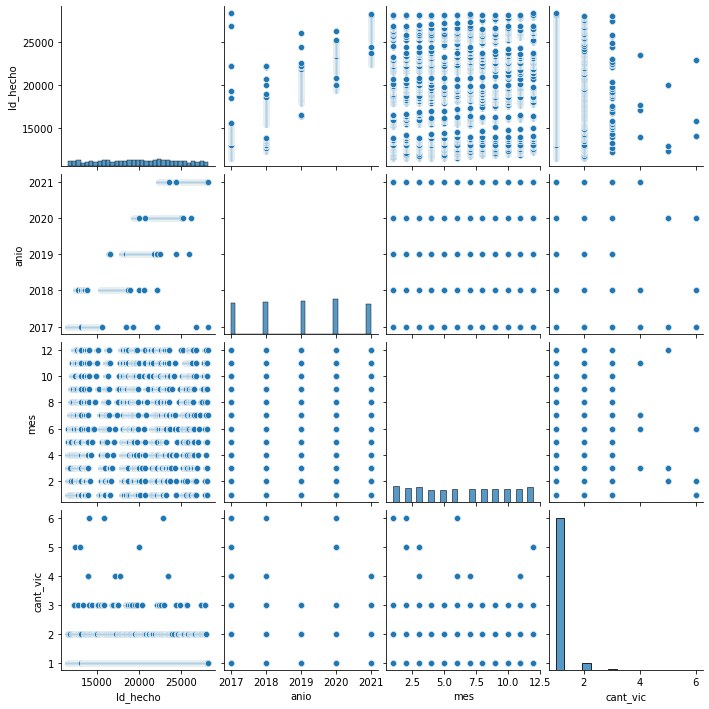

In [7]:
fig = plt.figure(figsize=(15, 5))
sns.pairplot(datos)
plt.show()

### Distribución de los datos originales

In [ ]:
for column in datos.columns:
    try:
        sns.histplot(datos[column])
        plt.show()
    except:
        continue

## Escalamiento

### Escala en función del mínimo y máximo

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Separar características numéricas y categóricas
numeric_features = datos.select_dtypes(include=['int', 'float']).columns

# Escalamiento de características numéricas
scaler = MinMaxScaler()
scaled_data = datos.copy()
scaled_data[numeric_features] = scaler.fit_transform(datos[numeric_features])

In [10]:
# convierte vectores de numpy a DataFrames para graficarlos
datos_escalados = pd.DataFrame(scaled_data, columns=datos.columns)

In [11]:
datos_escalados

,Id_hecho,provincia,localidad,anio,mes,tipo_lugar,tipo_lugar_ampliado,motivo_origen_registro,fecha_hecho,hora_hecho,tipo_persona_id,tipo_persona,sexo_victima,rango_edad_victima,clase_victima,sexo_inculpado,tr_edad_inculpado,relacion_inculpado_victima,relacion_victima_inculpado,cant_vic
0,0.000000,NEUQUEN,Plottier,0.0,0.000000,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12929,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,0.0
1,0.000000,NEUQUEN,Plottier,0.0,0.000000,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12930,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,0.0
2,0.000000,NEUQUEN,Plottier,0.0,0.000000,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Imputado idRegistro 12931,Imputado,No corresponde,No corresponde,No corresponde,Masculino,Sin determinar,Sin relación,No corresponde,0.0
3,0.000000,NEUQUEN,Plottier,0.0,0.000000,Domicilio particular,Domicilio particular,Intervención policial,14/1/2017,22:38:00,Víctima idRegistro 12235,Víctima,Masculino,45-49,Civil,No corresponde,No corresponde,No corresponde,Sin relación,0.0
4,0.000060,NEUQUEN,Cutral Có,0.0,0.000000,Vía pública,Vía pública,Intervención policial,7/1/2017,10:35:00,Imputado idRegistro 12932,Imputado,No corresponde,No corresponde,No corresponde,Masculino,30-34,Sin relación,No corresponde,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25155,0.991989,BUENOS AIRES,Florencio Varela,1.0,0.909091,Vía pública,Vía pública,Intervención policial,10/11/2021,11:11:11,Víctima idRegistro 29888,Víctima,Masculino,45-49,Civil,No corresponde,No corresponde,No corresponde,Otras relaciones no familiares,0.0
25156,0.999402,TIERRA DEL FUEGO,Ushuaia,1.0,0.545455,Domicilio particular,Domicilio particular,Intervención policial,4/7/2021,12:00:00,Imputado idRegistro 32993,Imputado,No corresponde,No corresponde,No corresponde,Femenino,25-29,Conyuge/ pareja,No corresponde,0.0
25157,0.999402,TIERRA DEL FUEGO,Ushuaia,1.0,0.545455,Domicilio particular,Domicilio particular,Intervención policial,4/7/2021,12:00:00,Víctima idRegistro 30020,Víctima,Masculino,25-29,Civil,No corresponde,No corresponde,No corresponde,Conyuge/ pareja,0.0
25158,1.000000,ENTRE RIOS,Concordia,0.0,1.000000,Vía pública,Vía pública,Intervención policial,25/12/2017,11:11:11,Imputado idRegistro 33004,Imputado,No corresponde,No corresponde,No corresponde,Masculino,30-34,Sin relación,No corresponde,0.0


## Codificacion de datos categoricos

In [12]:
#Observacion de los tipos de datos por columna, con el fin de encontrar aquellas con datos categoricos/object
print(datos.dtypes)

Id_hecho                       int64
provincia                     object
localidad                     object
anio                           int64
mes                            int64
tipo_lugar                    object
tipo_lugar_ampliado           object
motivo_origen_registro        object
fecha_hecho                   object
hora_hecho                    object
tipo_persona_id               object
tipo_persona                  object
sexo_victima                  object
rango_edad_victima            object
clase_victima                 object
sexo_inculpado                object
tr_edad_inculpado             object
relacion_inculpado_victima    object
relacion_victima_inculpado    object
cant_vic                       int64
dtype: object


### Categoricos ordinales

In [ ]:
##No hay 

### Categoricos nominales

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Seleccionar las columnas de tipo object
object_columns = datos_escalados.select_dtypes(include=['object']).columns.copy()

# Iterar sobre las columnas seleccionadas y aplicar la codificación
for column in object_columns:
    encoder = LabelEncoder()
    datos_escalados[column] = encoder.fit_transform(datos_escalados[column].astype(str))

In [15]:
datos_escalados

,Id_hecho,provincia,localidad,anio,mes,tipo_lugar,tipo_lugar_ampliado,motivo_origen_registro,fecha_hecho,hora_hecho,tipo_persona_id,tipo_persona,sexo_victima,rango_edad_victima,clase_victima,sexo_inculpado,tr_edad_inculpado,relacion_inculpado_victima,relacion_victima_inculpado,cant_vic
0,0.000000,14,616,0.0,0.000000,2,11,1,298,785,0,0,2,19,2,1,19,12,7,0.0
1,0.000000,14,616,0.0,0.000000,2,11,1,298,785,1,0,2,19,2,1,19,12,7,0.0
2,0.000000,14,616,0.0,0.000000,2,11,1,298,785,2,0,2,19,2,1,19,12,7,0.0
3,0.000000,14,616,0.0,0.000000,2,11,1,298,785,13646,1,1,8,0,2,18,7,12,0.0
4,0.000060,14,231,0.0,0.000000,6,22,1,1632,368,3,0,2,19,2,1,4,12,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25155,0.991989,0,298,1.0,0.909091,6,22,1,73,385,25137,1,1,8,0,2,18,7,8,0.0
25156,0.999402,22,845,1.0,0.545455,2,11,1,1502,410,13571,0,2,19,2,0,3,1,7,0.0
25157,0.999402,22,845,1.0,0.545455,2,11,1,1502,410,25141,1,1,3,0,2,18,7,1,0.0
25158,1.000000,7,206,0.0,1.000000,6,22,1,1028,385,13573,0,2,19,2,1,4,12,7,0.0


## Reduccion de dimencionalidad

In [16]:
from sklearn.feature_selection import SelectPercentile, chi2

In [17]:
def reduccion(data, lista_columnas, porcentaje):
    y = data[lista_columnas].copy()  # Variable objetivo numérica
    X = data.drop(columns=lista_columnas).copy()  # DataFrame con características numéricas excepto la variable objetivo
    
    # Aplicar la reducción de dimensionalidad
    selector = SelectPercentile(chi2, percentile=porcentaje)
    datos_reducidos = selector.fit_transform(X, y)
    
    # Obtener las columnas seleccionadas
    columnas_seleccionadas = X.columns[selector.get_support()]
    
    # Crear el DataFrame reducido con las columnas seleccionadas
    df_reducido = pd.DataFrame(datos_reducidos, columns=columnas_seleccionadas)
    
    # Agregar la columna 'sexo_victima' al DataFrame reducido
    df_reducido[lista_columnas] = y
    
    return df_reducido

In [18]:
print(disp(datos_escalados))

,Id_hecho,provincia,localidad,anio,mes,tipo_lugar,tipo_lugar_ampliado,motivo_origen_registro,fecha_hecho,hora_hecho,tipo_persona_id,tipo_persona,sexo_victima,rango_edad_victima,clase_victima,sexo_inculpado,tr_edad_inculpado,relacion_inculpado_victima,relacion_victima_inculpado,cant_vic
0,0.000000,14,616,0.0,0.000000,2,11,1,298,785,0,0,2,19,2,1,19,12,7,0.0
1,0.000000,14,616,0.0,0.000000,2,11,1,298,785,1,0,2,19,2,1,19,12,7,0.0
2,0.000000,14,616,0.0,0.000000,2,11,1,298,785,2,0,2,19,2,1,19,12,7,0.0
3,0.000000,14,616,0.0,0.000000,2,11,1,298,785,13646,1,1,8,0,2,18,7,12,0.0
4,0.000060,14,231,0.0,0.000000,6,22,1,1632,368,3,0,2,19,2,1,4,12,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25155,0.991989,0,298,1.0,0.909091,6,22,1,73,385,25137,1,1,8,0,2,18,7,8,0.0
25156,0.999402,22,845,1.0,0.545455,2,11,1,1502,410,13571,0,2,19,2,0,3,1,7,0.0
25157,0.999402,22,845,1.0,0.545455,2,11,1,1502,410,25141,1,1,3,0,2,18,7,1,0.0
25158,1.000000,7,206,0.0,1.000000,6,22,1,1028,385,13573,0,2,19,2,1,4,12,7,0.0


None


Se reduce la dimensionalidad del dataframe en base a las columnas que se utilizaran para responder cada pregunta

- 1. ¿Cuál es la proporción de víctimas masculinas y femeninas en los delitos registrados?

In [21]:
datos_sexo_victima = reduccion(datos_escalados, 'sexo_victima', 5)

In [22]:
#se agrega la columna del id del hecho
datos_sexo_victima['Id_hecho'] = datos.Id_hecho

In [23]:
print(disp(datos_sexo_victima))

,tipo_persona_id,sexo_victima,Id_hecho
0,0.0,2,11535
1,1.0,2,11535
2,2.0,2,11535
3,13646.0,1,11535
4,3.0,2,11536
...,...,...,...
25155,25137.0,1,28129
25156,13571.0,2,28253
25157,25141.0,1,28253
25158,13573.0,2,28263


None


In [24]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion01_datos_sexo_victima.csv"  # Ruta y nombre del archivo de destino
datos_sexo_victima.to_csv(ruta_destino, index=False)

- 2. ¿Cuáles son los departamentos con mayor número de delitos?

In [25]:
datos_deptos_delitos = reduccion(datos_escalados, 'localidad', 5)

In [26]:
#Se agrega a columna del id del hecho
datos_deptos_delitos['Id_hecho'] = datos.Id_hecho

In [27]:
print(disp(datos_deptos_delitos))

,tipo_persona_id,localidad,Id_hecho
0,0.0,616,11535
1,1.0,616,11535
2,2.0,616,11535
3,13646.0,616,11535
4,3.0,231,11536
...,...,...,...
25155,25137.0,298,28129
25156,13571.0,845,28253
25157,25141.0,845,28253
25158,13573.0,206,28263


None


In [28]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion02_datos_deptos_delitos.csv"  # Ruta y nombre del archivo de destino
datos_deptos_delitos.to_csv(ruta_destino, index=False)

- 3. ¿Cuáles son los motivos más comunes que originaron el registro de un delito?

In [29]:
datos_motivos_delitos = reduccion(datos_escalados, 'motivo_origen_registro', 5)

In [30]:
#Se agrega la columna del id del hecho
datos_motivos_delitos['Id_hecho'] = datos.Id_hecho

In [31]:
print(disp(datos_motivos_delitos))

,tipo_persona_id,motivo_origen_registro,Id_hecho
0,0.0,1,11535
1,1.0,1,11535
2,2.0,1,11535
3,13646.0,1,11535
4,3.0,1,11536
...,...,...,...
25155,25137.0,1,28129
25156,13571.0,1,28253
25157,25141.0,1,28253
25158,13573.0,1,28263


None


In [32]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion03_datos_motivo_delitos.csv"  # Ruta y nombre del archivo de destino
datos_motivos_delitos.to_csv(ruta_destino, index=False)

- 4. ¿Existe alguna relación entre el mes del año y la cantidad de delitos?

In [35]:
datos_mes_delitos = pd.DataFrame()
datos_mes_delitos['mes'] = datos_escalados['mes']
datos_mes_delitos['anio'] = datos_escalados['anio']
datos_mes_delitos['Id_hecho'] = datos.Id_hecho

In [36]:
print(disp(datos_mes_delitos))

,mes,anio,Id_hecho
0,0.000000,0.0,11535
1,0.000000,0.0,11535
2,0.000000,0.0,11535
3,0.000000,0.0,11535
4,0.000000,0.0,11536
...,...,...,...
25155,0.909091,1.0,28129
25156,0.545455,1.0,28253
25157,0.545455,1.0,28253
25158,1.000000,0.0,28263


None


In [37]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion04_datos_mes_delitos.csv"  # Ruta y nombre del archivo de destino
datos_motivos_delitos.to_csv(ruta_destino, index=False)

- 5. ¿Hay alguna relación entre el lugar y el género de la victima? Cual es el genero que mayormente ocupa el rol de la victima?, que proporcion hay para cada sexo?

In [39]:
datos_lugar_delitos_a = reduccion(datos_escalados, 'tipo_lugar', 5)
datos_lugar_delitos_b = reduccion(datos_escalados, 'sexo_victima', 5)

In [40]:
datos_lugar_genero_delito = pd.concat([datos_lugar_delitos_a, datos_lugar_delitos_b])

In [42]:
datos_lugar_genero_delito['Id_hecho'] = datos['Id_hecho']

In [43]:
print(disp(datos_lugar_genero_delito))

,tipo_persona_id,tipo_lugar,sexo_victima,Id_hecho
0,0.0,2.0,NaN,11535
1,1.0,2.0,NaN,11535
2,2.0,2.0,NaN,11535
3,13646.0,2.0,NaN,11535
4,3.0,6.0,NaN,11536
...,...,...,...,...
25155,25137.0,NaN,1.0,28129
25156,13571.0,NaN,2.0,28253
25157,25141.0,NaN,1.0,28253
25158,13573.0,NaN,2.0,28263


None


In [44]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion05_datos_lugar_genero_v_delito.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)

- 6. ¿Hay alguna relación entre el lugar y el género del inculpado? Cual es el genero que mayormente ocupa el rol de inculpad@?, que proporcion hay para cada sexo?

In [45]:
datos_lugar_delitos_a = reduccion(datos_escalados, 'tipo_lugar', 5)
datos_lugar_delitos_b = reduccion(datos_escalados, 'sexo_inculpado', 5)

In [46]:
datos_lugar_genero_delito = pd.concat([datos_lugar_delitos_a, datos_lugar_delitos_b])

In [47]:
datos_lugar_genero_delito['Id_hecho'] = datos['Id_hecho']

In [48]:
print(disp(datos_lugar_genero_delito))

,tipo_persona_id,tipo_lugar,sexo_inculpado,Id_hecho
0,0.0,2.0,NaN,11535
1,1.0,2.0,NaN,11535
2,2.0,2.0,NaN,11535
3,13646.0,2.0,NaN,11535
4,3.0,6.0,NaN,11536
...,...,...,...,...
25155,25137.0,NaN,2.0,28129
25156,13571.0,NaN,0.0,28253
25157,25141.0,NaN,2.0,28253
25158,13573.0,NaN,1.0,28263


None


In [49]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion06_datos_lugar_genero_i_delito.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)

- 7. Cantidad de hechos por año?, cuales son los 3 años con mayor numero de delitos?

In [73]:
datos_anio_delitos = pd.DataFrame()
datos_anio_delitos['anio'] = datos_escalados['anio']
datos_anio_delitos['Id_hecho'] = datos.Id_hecho

In [74]:
print(disp(datos_anio_delitos))

,anio,Id_hecho
0,0.0,11535
1,0.0,11535
2,0.0,11535
3,0.0,11535
4,0.0,11536
...,...,...
25155,1.0,28129
25156,1.0,28253
25157,1.0,28253
25158,0.0,28263


None


In [75]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion07_datos_anio_delito.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)

- 8. Relacion entre la cantidad de inculpados y victimas por hecho

In [77]:
datos_inculpado_cant_vic_delitos = pd.DataFrame()
datos_inculpado_cant_vic_delitos['tipo_persona_id'] = datos_escalados.tipo_persona_id
datos_inculpado_cant_vic_delitos['cant_victimas'] = datos_escalados.cant_vic

In [78]:
datos_inculpado_cant_vic_delitos['Id_hecho'] = datos.Id_hecho

In [79]:
print(disp(datos_inculpado_cant_vic_delitos))

,tipo_persona_id,cant_victimas,Id_hecho
0,0,0.0,11535
1,1,0.0,11535
2,2,0.0,11535
3,13646,0.0,11535
4,3,0.0,11536
...,...,...,...
25155,25137,0.0,28129
25156,13571,0.0,28253
25157,25141,0.0,28253
25158,13573,0.0,28263


None


In [80]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion08_datos_inculpado_cant_vic_delitos.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)

- 9. 3 principales clases de victimas y la relacion de sexo de cada una.

In [ ]:
datos_lugar_delitos = reduccion(datos_escalados, 'tipo_lugar', 5)
datos_lugar_delitos['tipo_lugar'] = datos.tipo_lugar

datos_genero_delitos = reduccion(datos_escalados, 'sexo_victima', 5)
datos_genero_delitos['sexo_victima'] = datos.sexo_victima

datos_genero_delitos['Id_hecho'] = datos.Id_hecho

datos_lugar_genero_delito = pd.concat([datos_lugar_delitos, datos_genero_delitos])

In [ ]:
print(disp(datos_lugar_genero_delito))

,tipo_persona_id,tipo_lugar,sexo_victima,Id_hecho
0,0.0,Domicilio particular,NaN,NaN
1,1.0,Domicilio particular,NaN,NaN
2,2.0,Domicilio particular,NaN,NaN
3,13646.0,Domicilio particular,NaN,NaN
4,3.0,Vía pública,NaN,NaN
...,...,...,...,...
25155,25137.0,NaN,Masculino,28129.0
25156,13571.0,NaN,No corresponde,28253.0
25157,25141.0,NaN,Masculino,28253.0
25158,13573.0,NaN,No corresponde,28263.0


None


In [ ]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion04_datos_lugar_genero_v_delito.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)

- 10. Relacion entre la edad y el sexo de la victima

In [81]:
datos_edad_sexo_victima_a = reduccion(datos_escalados, 'sexo_victima', 5)
datos_edad_sexo_victima_b = reduccion(datos_escalados, 'rango_edad_victima', 5)

In [82]:
datos_edad_sexo_victima = pd.concat([datos_edad_sexo_victima_a, datos_edad_sexo_victima_b])

In [83]:
datos_edad_sexo_victima['Id_hecho'] = datos.Id_hecho

In [84]:
print(disp(datos_edad_sexo_victima))

,tipo_persona_id,sexo_victima,rango_edad_victima,Id_hecho
0,0.0,2.0,NaN,11535
1,1.0,2.0,NaN,11535
2,2.0,2.0,NaN,11535
3,13646.0,1.0,NaN,11535
4,3.0,2.0,NaN,11536
...,...,...,...,...
25155,25137.0,NaN,8.0,28129
25156,13571.0,NaN,19.0,28253
25157,25141.0,NaN,3.0,28253
25158,13573.0,NaN,19.0,28263


None


In [85]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion10_datos_edad_sexo_victima.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)

- 11. Relacion entre la edad y el sexo del inculpado

In [92]:
datos_edad_sexo_inculpado_a = reduccion(datos_escalados, 'sexo_inculpado', 5)
datos_edad_sexo_inculpado_b = reduccion(datos_escalados, 'tr_edad_inculpado', 5)

In [93]:
datos_edad_sexo_inculpado = pd.concat([datos_edad_sexo_inculpado_a, datos_edad_sexo_inculpado_b])

In [94]:
datos_edad_sexo_inculpado['Id_hecho'] = datos.Id_hecho

In [95]:
print(disp(datos_edad_sexo_inculpado))

,tipo_persona_id,sexo_inculpado,tr_edad_inculpado,Id_hecho
0,0.0,1.0,NaN,11535
1,1.0,1.0,NaN,11535
2,2.0,1.0,NaN,11535
3,13646.0,2.0,NaN,11535
4,3.0,1.0,NaN,11536
...,...,...,...,...
25155,25137.0,NaN,18.0,28129
25156,13571.0,NaN,3.0,28253
25157,25141.0,NaN,18.0,28253
25158,13573.0,NaN,4.0,28263


None


In [ ]:
#Se guarda el dataframe como CSV
ruta_destino = "../../datos/procesados/preparacion11_edad_inculpado.csv"  # Ruta y nombre del archivo de destino
datos_lugar_genero_delito.to_csv(ruta_destino, index=False)